# Table of Contents
<a id="table-of-contents"></a>
* [1. Introduction](#1)
* [2. General](#2)
    * [2.1. Numbers of rows and columns](#2.1)
    * [2.2. Numbers of missing values](#2.2)
    * [2.3. First 5 rows](#2.3)
* [3. Features](#3)
    * [3.1 Features description](#3.1)
    * [3.1 Features comparison](#3.2)
* [4. Survival Rate](#4)
    * [4.1 Calculation method](#4.1)
    * [4.2 Feature survival rate](#4.2)

[back to top](#table-of-contents)
<a id="1"></a>
# 1. Introduction

Kaggle competitions are incredibly fun and rewarding, but they can also be intimidating for people who are relatively new in their data science journey. In the past, Kaggle have launched many Playground competitions that are more approachable than Featured competition, and thus more beginner-friendly.

The goal of these competitions is to provide a fun, but less challenging, tabular dataset. These competitions will be great for people looking for something in between the Titanic Getting Started competition and a Featured competition.

The dataset is used for this competition is synthetic but based on a real dataset (in this case, the actual Titanic data!) and generated using a CTGAN. The statistical properties of this dataset are very similar to the original Titanic dataset, but there's no way to "cheat" by using public labels for predictions.

[back to top](#table-of-contents)
<a id="2"></a>
# 2. General

**Observations:**
* `train` and `test` dataset have a same `100,000` rows.
* There is `76,165` missing values in the `train` and `79,909` missing values in `test` dataset. 
* Features that have missing values are `Age`, `Ticket`, `Fare`, `Cabin` and `Embarked`. 
* Most of the missing value come from `Cabin` feature, which contributed almost 90% of missing values both in`train` and `test` dataset. 
* In a row wise, it contributes around `70%` of the data. Missing values need to be treated carefully.

In [1]:
import os
import joblib
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
train_df = pd.read_csv('/kaggle/input/tabular-playground-series-apr-2021/train.csv')
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-apr-2021/test.csv')

[back to top](#table-of-contents)
<a id="2.1"></a>
## 2.1. Numbers of rows and columns

In [3]:
print('Rows and Columns in train dataset:', train_df.shape)
print('Rows and Columns in test dataset:', test_df.shape)

Rows and Columns in train dataset: (100000, 12)
Rows and Columns in test dataset: (100000, 11)


[back to top](#table-of-contents)
<a id="2.2"></a>
## 2.2. Numbers of missing values

In [4]:
print('Missing values in train dataset:', sum(train_df.isnull().sum()))
print('Missing values in test dataset:', sum(test_df.isnull().sum()))

Missing values in train dataset: 76165
Missing values in test dataset: 79909


In [5]:
print('Missing values per columns in train dataset')
for col in train_df.columns:
    temp_col = train_df[col].isnull().sum()
    print(f'{col}: {temp_col}')

Missing values per columns in train dataset
PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 3292
SibSp: 0
Parch: 0
Ticket: 4623
Fare: 134
Cabin: 67866
Embarked: 250


In [6]:
print('Missing values per columns in test dataset')
for col in test_df.columns:
    temp_col = test_df[col].isnull().sum()
    print(f'{col}: {temp_col}')

Missing values per columns in test dataset
PassengerId: 0
Pclass: 0
Name: 0
Sex: 0
Age: 3487
SibSp: 0
Parch: 0
Ticket: 5181
Fare: 133
Cabin: 70831
Embarked: 277


[back to top](#table-of-contents)
<a id="2.3"></a>
## 2.3. First 5 rows

**First 5 rows in the train dataset**

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


**First 5 rows in the test dataset**

In [8]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C


[back to top](#table-of-contents)
<a id="3"></a>
# 3. Features

[back to top](#table-of-contents)
<a id="3.1"></a>
## 3.1. Features descriptions

The data contains the following information:
* **Pclass** - a proxy for socio-economic status (SES) where 1st = Upper, 2nd = Middle and 3rd = Lower. 
* **Sex** - male and female.
* **Age** - fractional if it less than 1 and age estimation in the form of xx.5.
* **SibSp** - number of siblings / spouses aboard the Synthanic; siblings are brother, sister, stepbrother and stepsister and spouses are husband and wife (mistresses and fiancés were ignored).
* **Parch** - # of parents / children aboard the Synthanic; parents are mother and father; child are daughter, son, stepdaughter and stepson. Some children travelled only with a nanny, therefore **Parch** is 0 for them.
* **Fare** - the paassenger fare.
* **Cabin** - the cabin number. 
* **Emarked** - port of embarkation where C is Cherbourg, Q is Queenstown and S is Southampton.
* **Ticket** - ticket number.
* **Name** - passengers name.
* **Survived** - target variable where 0 is not survived and 1 is survived.

[back to top](#table-of-contents)
<a id="3.2"></a>
## 3.2. Features comparison
This section will try to explore and compare features in the `train` and `test` dataset. It should be noted that some features are not the same between `train` and `test` dataset as can be seen more detail on each sub-sections.

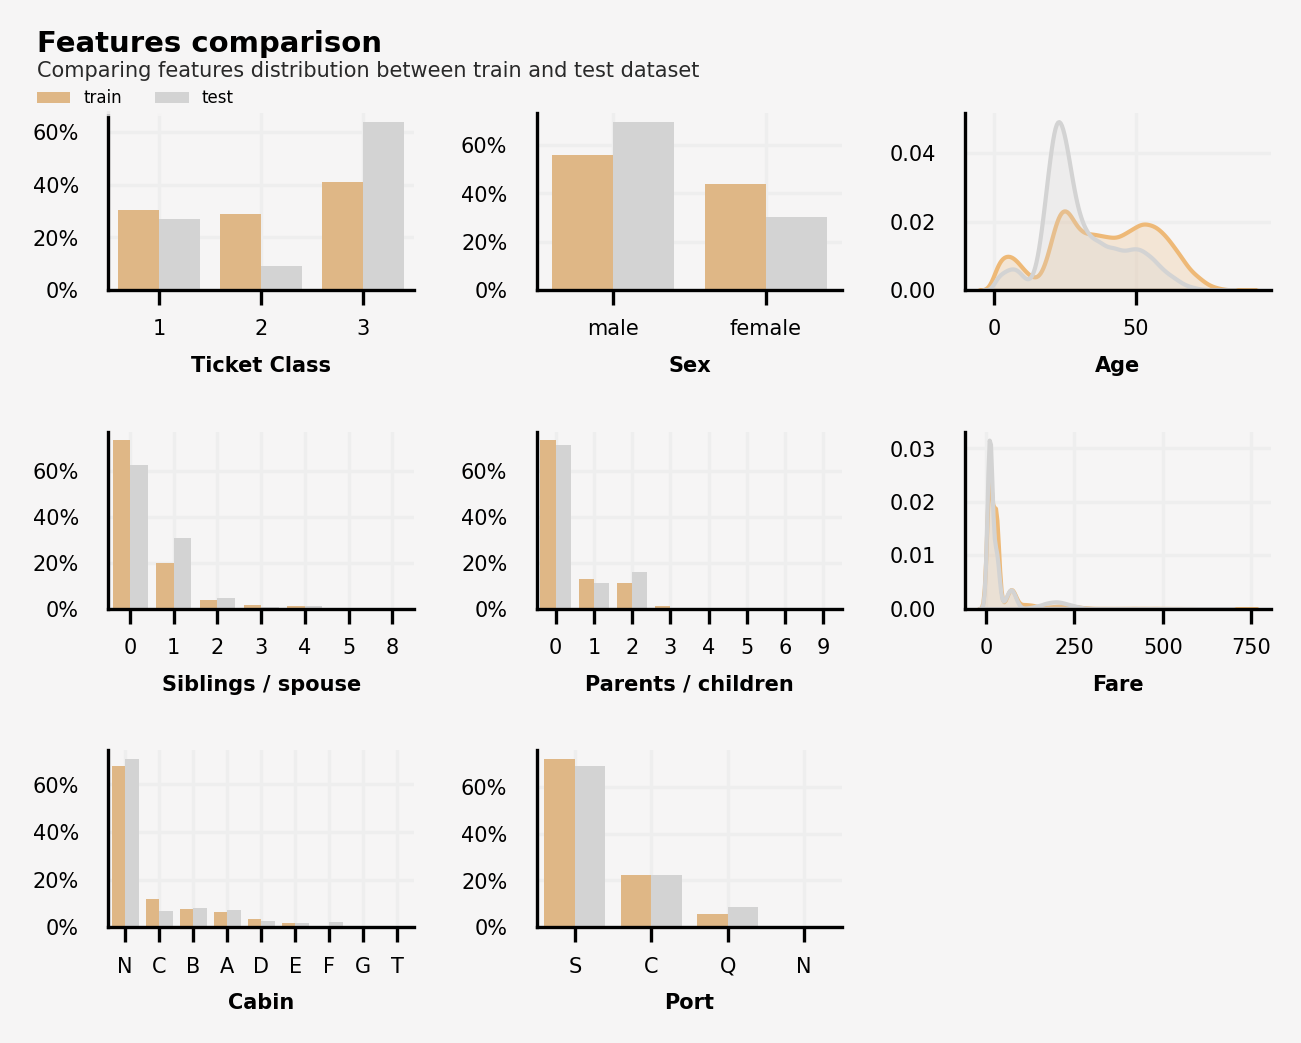

In [9]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 5), facecolor='#f6f5f5')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.4, hspace=0.8)

background_color = "#f6f5f5"
color_map = ['#eeb977', 'lightgray']
sns.set_palette(sns.color_palette(color_map))

column = 'Pclass'
temp_train = pd.DataFrame(train_df[column].value_counts()).reset_index(drop=False)
temp_train['source'] = 'train'
temp_test = pd.DataFrame(test_df[column].value_counts()).reset_index(drop=False)
temp_test['source'] = 'test'
temp_combine = pd.concat([temp_train, temp_test], axis=0)
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0.tick_params(axis = "y", which = "both", left = False)
ax0.text(-1.2, 88, 'Features comparison', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-1.2, 87, 'Comparing features distribution between train and test dataset', color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=temp_combine['index'], y=temp_combine[column]/1000, zorder=2, hue=temp_combine['source'])
ax0_sns.set_xlabel("Ticket Class",fontsize=5, weight='bold')
ax0_sns.set_ylabel('')
ax0.yaxis.set_major_formatter(ticker.PercentFormatter())
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=5)
ax0_sns.legend(ncol=2, facecolor=background_color, edgecolor=background_color, fontsize=4, bbox_to_anchor=(0.46, 1.22))

column = 'Sex'
temp_train = pd.DataFrame(train_df[column].value_counts()).reset_index(drop=False)
temp_train['source'] = 'train'
temp_test = pd.DataFrame(test_df[column].value_counts()).reset_index(drop=False)
temp_test['source'] = 'test'
temp_combine = pd.concat([temp_train, temp_test], axis=0)
ax1 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1.legend(prop={'size': 3})
ax1.tick_params(axis = "y", which = "both", left = False)
ax1_sns = sns.barplot(ax=ax1, x=temp_combine['index'], y=temp_combine[column]/1000, zorder=2, hue=temp_combine['source'])
ax1_sns.set_xlabel('Sex', fontsize=5, weight='bold')
ax1_sns.set_ylabel('')
ax1.yaxis.set_major_formatter(ticker.PercentFormatter())
ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax1_sns.tick_params(labelsize=5)
ax1_sns.get_legend().remove()

column = 'Age'
ax3 = fig.add_subplot(gs[0, 2])
for s in ["right", "top"]:
    ax3.spines[s].set_visible(False)
ax3.set_facecolor(background_color)
ax3.legend(prop={'size': 3})
ax3.tick_params(axis = "y", which = "both", left = False)
ax3_sns = sns.kdeplot(ax=ax3, x=train_df['Age'], zorder=2, shade=True)
ax3_sns = sns.kdeplot(ax=ax3, x=test_df['Age'], zorder=2, shade=True)
ax3_sns.set_xlabel('Age', fontsize=5, weight='bold')
ax3_sns.set_ylabel('')
ax3_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax3_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax3_sns.tick_params(labelsize=5)
ax3_sns.get_legend().remove()

column = 'SibSp'
temp_train = pd.DataFrame(train_df[column].value_counts()).reset_index(drop=False)
temp_train['source'] = 'train'
temp_test = pd.DataFrame(test_df[column].value_counts()).reset_index(drop=False)
temp_test['source'] = 'test'
temp_combine = pd.concat([temp_train, temp_test], axis=0)
ax4 = fig.add_subplot(gs[1, 0])
for s in ["right", "top"]:
    ax4.spines[s].set_visible(False)
ax4.set_facecolor(background_color)
ax4.legend(prop={'size': 3})
ax4.tick_params(axis = "y", which = "both", left = False)
ax4_sns = sns.barplot(ax=ax4, x=temp_combine['index'], y=temp_combine[column]/1000, zorder=2, hue=temp_combine['source'])
ax4_sns.set_xlabel('Siblings / spouse', fontsize=5, weight='bold')
ax4_sns.set_ylabel('')
ax4.yaxis.set_major_formatter(ticker.PercentFormatter())
ax4_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax4_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax4_sns.tick_params(labelsize=5)
ax4_sns.get_legend().remove()

column = 'Parch'
temp_train = pd.DataFrame(train_df[column].value_counts()).reset_index(drop=False)
temp_train['source'] = 'train'
temp_test = pd.DataFrame(test_df[column].value_counts()).reset_index(drop=False)
temp_test['source'] = 'test'
temp_combine = pd.concat([temp_train, temp_test], axis=0)
ax5 = fig.add_subplot(gs[1, 1])
for s in ["right", "top"]:
    ax5.spines[s].set_visible(False)
ax5.set_facecolor(background_color)
ax5.legend(prop={'size': 3})
ax5.tick_params(axis = "y", which = "both", left = False)
ax5_sns = sns.barplot(ax=ax5, x=temp_combine['index'], y=temp_combine[column]/1000, zorder=2, hue=temp_combine['source'])
ax5_sns.set_xlabel('Parents / children', fontsize=5, weight='bold')
ax5_sns.set_ylabel('')
ax5.yaxis.set_major_formatter(ticker.PercentFormatter())
ax5_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax5_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax5_sns.tick_params(labelsize=5)
ax5_sns.get_legend().remove()

column = 'Fare'
ax6 = fig.add_subplot(gs[1, 2])
for s in ["right", "top"]:
    ax6.spines[s].set_visible(False)
ax6.set_facecolor(background_color)
ax6.legend(prop={'size': 3})
ax6.tick_params(axis = "y", which = "both", left = False)
ax6_sns = sns.kdeplot(ax=ax6, x=train_df['Fare'], zorder=2, shade=True)
ax6_sns = sns.kdeplot(ax=ax6, x=test_df['Fare'], zorder=2, shade=True)
ax6_sns.set_xlabel('Fare', fontsize=5, weight='bold')
ax6_sns.set_ylabel('')
ax6_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax6_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax6_sns.tick_params(labelsize=5)
ax6_sns.get_legend().remove()

train_df["Cabin"] = train_df["Cabin"].fillna("No")
train_df["Cabin_code"] = train_df["Cabin"].str[0]
test_df["Cabin"] = test_df["Cabin"].fillna("No")
test_df["Cabin_code"] = test_df["Cabin"].str[0]

column = 'Cabin_code'
temp_train = pd.DataFrame(train_df[column].value_counts()).reset_index(drop=False)
temp_train['source'] = 'train'
temp_test = pd.DataFrame(test_df[column].value_counts()).reset_index(drop=False)
temp_test['source'] = 'test'
temp_combine = pd.concat([temp_train, temp_test], axis=0)
ax7 = fig.add_subplot(gs[2, 0])
for s in ["right", "top"]:
    ax7.spines[s].set_visible(False)
ax7.set_facecolor(background_color)
ax7.legend(prop={'size': 3})
ax7.tick_params(axis = "y", which = "both", left = False)
ax7_sns = sns.barplot(ax=ax7, x=temp_combine['index'], y=temp_combine[column]/1000, zorder=2, hue=temp_combine['source'])
ax7_sns.set_xlabel('Cabin', fontsize=5, weight='bold')
ax7_sns.set_ylabel('')
ax7.yaxis.set_major_formatter(ticker.PercentFormatter())
ax7_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax7_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax7_sns.tick_params(labelsize=5)
ax7_sns.get_legend().remove()

train_df["Embarked"] = train_df["Embarked"].fillna("N")
test_df["Embarked"] = test_df["Embarked"].fillna("N")

column = 'Embarked'
temp_train = pd.DataFrame(train_df[column].value_counts()).reset_index(drop=False)
temp_train['source'] = 'train'
temp_test = pd.DataFrame(test_df[column].value_counts()).reset_index(drop=False)
temp_test['source'] = 'test'
temp_combine = pd.concat([temp_train, temp_test], axis=0)
ax8 = fig.add_subplot(gs[2, 1])
for s in ["right", "top"]:
    ax8.spines[s].set_visible(False)
ax8.set_facecolor(background_color)
ax8.legend(prop={'size': 3})
ax8.tick_params(axis = "y", which = "both", left = False)
ax8_sns = sns.barplot(ax=ax8, x=temp_combine['index'], y=temp_combine[column]/1000, zorder=2, hue=temp_combine['source'])
ax8_sns.set_xlabel('Port', fontsize=5, weight='bold')
ax8_sns.set_ylabel('')
ax8.yaxis.set_major_formatter(ticker.PercentFormatter())
ax8_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax8_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax8_sns.tick_params(labelsize=5)
ax8_sns.get_legend().remove()

plt.show()

* **Pclass**
    * Proportions between each classes are different in the `train` and `test`:
        * `Class 3` in `train` dataset contributes `40%` while in `test` dataset, it has a contribution above `60%`.
        * `Class 2` is at a very low of `10%` in `test` dataset while in `train` dataset, it contributes around `30%`.
        * `Class 1` in the `train` and `test` dataset are quite the same but it is higher in the train dataset.

* **Sex**
    * Proportions between each classes are different in the `train` and `test`: 
    * `female` contributed more than `40%` in `train` dataset while in `test` dataset `female` only contributed `30%` of total dataset.
    * `male` contributed more than `50%` in the `train` and `test` dataset. 

* **Age**
    * Distribution between `train` and `test` dataset are different especially on range of `15-40`. 
    * There are missing value in the `train` and `test` dataset, they are `3,292` and `3,487`, respectively.

* **SibSp**
    * Number of siblings / spouses can be categorize into `7 categories`, this feature can be treated as a continuous or categorical and see how the model performed.
    * There is `10%` differences on passenger that travel with 1 sibbling / spose between `train` and `test` dataset.
    * The highest / maximum number of sibblings / spouses that is going aboard with the passengers is `8 people` and the lowest is traveling without any sibblings / spouses. 
    * Most of Synthanic passenger don't travel with their sibblings / sposes.

* **Parch**
    * Number of parents / children can be categorize into `8 categories`, this feature can also be treated as a continuous or categorical.
    * The highest number of parents / children is `8 people` and the lowest is 0 meaning the passengers is traveling without their parents / childrens. 
    * This features strenghten the idea that most of the Synthanic passengers are traveling alone.

* **Fare**
    * `Fare` distribution between `train` and `test` dataset are quite resemble each other, though it's not perfect especially in the lower fare.
    * The `highest` fare in `train` dataset is `744.66` while in `test` dataset is `680.7`.
    * The `lowest` fare in `test` dataset is `0.05` and `0.68` in the `train` dataset.
    * The `average` fare is `43.9` in `train` dataset and `45.4` in `test` dataset, not a far gap between them.
    * Missing value in this feature are `134` in `train` dataset and `133` in `test` dataset.

* **Cabin**
    * `Cabin` numbers can extracted by taking the first letter in the feature. 
    * Be aware that this feature has the highest number of missing value of `67,866` in `train` dataset and `70,831` in `test` dataset, meaaning it's almost `70%` of the information are missing. A new `cabin` category `N` is created to address passengers without cabin number.
    * `Cabin` can be categorize into `9 categories`, this feature can be treated as a continuous or categorical and see how the model performed.
     * There is quite a distinct imbalance data between `train` and `test` dataset in cabin `C`.

* **Embarked**
    * A new `embarked` category `N` is created to address passengers without port of Embarkation.
    * Most of Synthanic passengers are embarked from `Southampton` which contributes almost `70%` of the passengers.
    * There are `205` missing values in `train` dataset and `277` missing values in the `test` dataset.

[back to top](#table-of-contents)
<a id="4"></a>
# 4. Survival Rate

[back to top](#table-of-contents)
<a id="4.1"></a>
## 4.1. Calculation method

There are 2 calculation method to calculate survival rate:
* a. By dividing survived passengers in each category with total observations which is `100,000` which is used in this notebook
* b. There is another way to calculate the `survival rate` by dividing the survived passengers with its own category observations. 

**For example:**

There is 3 classes for `ticket class`, total passenger with `class 1` is `30,315` and the survived passengers is `17,576`. Based on the notes above, the `survival rate` will be:
* Calculation a will have a survival rate of  17,576 / 100,000 = 17,6%, this calculation is used in this notebook.
* Calculation b will have a survival rate of  17,576 / 30,315 = 58%

[back to top](#table-of-contents)
<a id="4.2"></a>
## 4.2. Feature survival rate

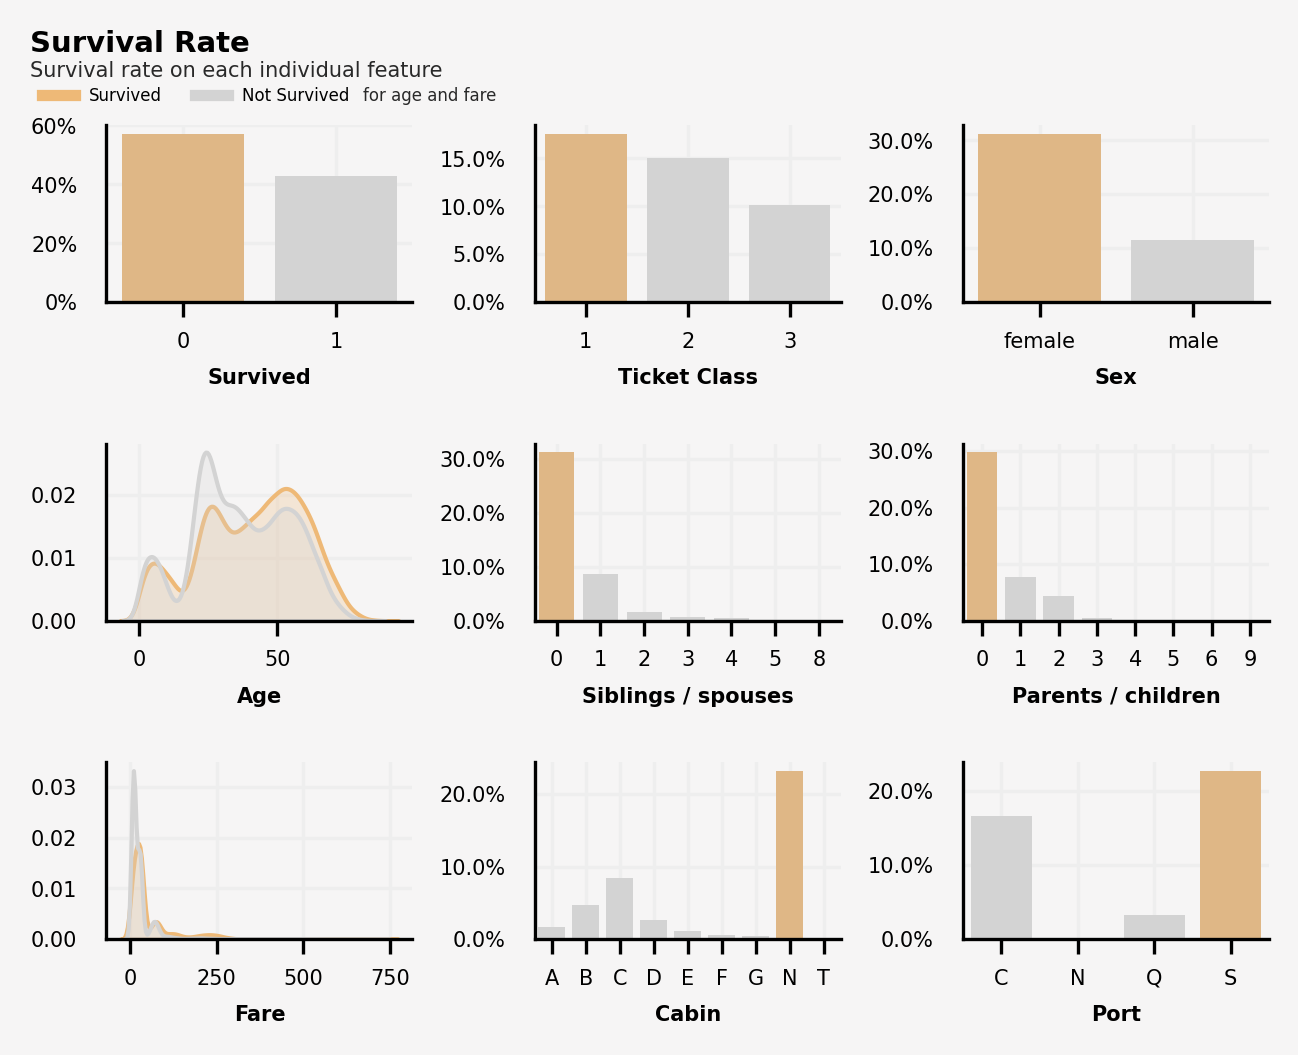

In [10]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 5), facecolor='#f6f5f5')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.4, hspace=0.8)

background_color = "#f6f5f5"

column = 'Survived'
color_map = ['#eeb977', 'lightgray']
sns.set_palette(sns.color_palette(color_map))
temp_train = pd.DataFrame(train_df[column].value_counts()).reset_index(drop=False)
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0.tick_params(axis = "y", which = "both", left = False)
ax0.text(-1, 83, 'Survival Rate', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-1, 82, 'Survival rate on each individual feature', color='#292929', fontsize=5, ha='left', va='top')
ax0.text(1.18, 73.3, 'for age and fare', color='#292929', fontsize=4, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=temp_train['index'], y=temp_train[column]/1000, zorder=2)
ax0_sns.set_xlabel("Survived",fontsize=5, weight='bold')
ax0_sns.set_ylabel('')
ax0.yaxis.set_major_formatter(ticker.PercentFormatter())
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=5)
ax0_sns.legend(['Survived', 'Not Survived'], ncol=2, facecolor=background_color, edgecolor=background_color, fontsize=4, bbox_to_anchor=(-0.26, 1.3), loc='upper left')
leg = ax0_sns.get_legend()
leg.legendHandles[0].set_color('#eeb977')
leg.legendHandles[1].set_color('lightgray')

column = 'Pclass'
color_map = ['#eeb977', 'lightgray', 'lightgray']
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax1 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1.tick_params(axis = "y", which = "both", left = False)
ax1_sns = sns.barplot(ax=ax1, x=temp_train.index, y=temp_train/1000, zorder=2)
ax1_sns.set_xlabel("Ticket Class",fontsize=5, weight='bold')
ax1_sns.set_ylabel('')
ax1.yaxis.set_major_formatter(ticker.PercentFormatter())
ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax1_sns.tick_params(labelsize=5)

column = 'Sex'
color_map = ['#eeb977', 'lightgray']
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax2 = fig.add_subplot(gs[0, 2])
for s in ["right", "top"]:
    ax2.spines[s].set_visible(False)
ax2.set_facecolor(background_color)
ax2.tick_params(axis = "y", which = "both", left = False)
ax2_sns = sns.barplot(ax=ax2, x=temp_train.index, y=temp_train/1000, zorder=2)
ax2_sns.set_xlabel("Sex",fontsize=5, weight='bold')
ax2_sns.set_ylabel('')
ax2.yaxis.set_major_formatter(ticker.PercentFormatter())
ax2_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax2_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax2_sns.tick_params(labelsize=5)

column = 'Age'
color_map = ['#eeb977', 'lightgray']
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax3 = fig.add_subplot(gs[1, 0])
for s in ["right", "top"]:
    ax3.spines[s].set_visible(False)
ax3.set_facecolor(background_color)
ax3.tick_params(axis = "y", which = "both", left = False)
ax3_sns = sns.kdeplot(ax=ax3, x=train_df[train_df['Survived']==1]['Age'], zorder=2, shade=True)
ax3_sns = sns.kdeplot(ax=ax3, x=train_df[train_df['Survived']==0]['Age'], zorder=2, shade=True)
ax3_sns.set_xlabel("Age",fontsize=5, weight='bold')
ax3_sns.set_ylabel('')
ax3_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax3_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax3_sns.tick_params(labelsize=5)

column = 'SibSp'
color_map = ['lightgray' for _ in range(7)]
color_map[0] = '#eeb977'
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax4 = fig.add_subplot(gs[1, 1])
for s in ["right", "top"]:
    ax4.spines[s].set_visible(False)
ax4.set_facecolor(background_color)
ax4.tick_params(axis = "y", which = "both", left = False)
ax4_sns = sns.barplot(ax=ax4, x=temp_train.index, y=temp_train/1000, zorder=2)
ax4_sns.set_xlabel("Siblings / spouses",fontsize=5, weight='bold')
ax4_sns.set_ylabel('')
ax4.yaxis.set_major_formatter(ticker.PercentFormatter())
ax4_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax4_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax4_sns.tick_params(labelsize=5)

column = 'Parch'
color_map = ['lightgray' for _ in range(8)]
color_map[0] = '#eeb977'
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax5 = fig.add_subplot(gs[1, 2])
for s in ["right", "top"]:
    ax5.spines[s].set_visible(False)
ax5.set_facecolor(background_color)
ax5.tick_params(axis = "y", which = "both", left = False)
ax5_sns = sns.barplot(ax=ax5, x=temp_train.index, y=temp_train/1000, zorder=2)
ax5_sns.set_xlabel("Parents / children",fontsize=5, weight='bold')
ax5_sns.set_ylabel('')
ax5.yaxis.set_major_formatter(ticker.PercentFormatter())
ax5_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax5_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax5_sns.tick_params(labelsize=5)

column = 'Fare'
color_map = ['#eeb977', 'lightgray']
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax6 = fig.add_subplot(gs[2, 0])
for s in ["right", "top"]:
    ax6.spines[s].set_visible(False)
ax6.set_facecolor(background_color)
ax6.tick_params(axis = "y", which = "both", left = False)
ax6_sns = sns.kdeplot(ax=ax6, x=train_df[train_df['Survived']==1]['Fare'], zorder=2, shade=True)
ax6_sns = sns.kdeplot(ax=ax6, x=train_df[train_df['Survived']==0]['Fare'], zorder=2, shade=True)
ax6_sns.set_xlabel("Fare",fontsize=5, weight='bold')
ax6_sns.set_ylabel('')
ax6_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax6_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax6_sns.tick_params(labelsize=5)

column = 'Cabin_code'
color_map = ['lightgray' for _ in range(9)]
color_map[7] = '#eeb977'
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax7 = fig.add_subplot(gs[2, 1])
for s in ["right", "top"]:
    ax7.spines[s].set_visible(False)
ax7.set_facecolor(background_color)
ax7.tick_params(axis = "y", which = "both", left = False)
ax7_sns = sns.barplot(ax=ax7, x=temp_train.index, y=temp_train/1000, zorder=2)
ax7_sns.set_xlabel("Cabin",fontsize=5, weight='bold')
ax7_sns.set_ylabel('')
ax7.yaxis.set_major_formatter(ticker.PercentFormatter())
ax7_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax7_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax7_sns.tick_params(labelsize=5)

column = 'Embarked'
color_map = ['lightgray' for _ in range(4)]
color_map[3] = '#eeb977'
sns.set_palette(sns.color_palette(color_map))
temp_train = train_df.groupby(column)['Survived'].sum()
ax8 = fig.add_subplot(gs[2, 2])
for s in ["right", "top"]:
    ax8.spines[s].set_visible(False)
ax8.set_facecolor(background_color)
ax8.tick_params(axis = "y", which = "both", left = False)
ax8_sns = sns.barplot(ax=ax8, x=temp_train.index, y=temp_train/1000, zorder=2)
ax8_sns.set_xlabel("Port",fontsize=5, weight='bold')
ax8_sns.set_ylabel('')
ax8.yaxis.set_major_formatter(ticker.PercentFormatter())
ax8_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax8_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax8_sns.tick_params(labelsize=5)

* **Survived**

    * There are `57,226` of Synthanic passengers `not survived` and `42,774` `survived` the accident, converted to `survival rate` of `57.2%` for `not survived` and `42.8%` for `survived`.

* **Pclass**

    * Ticket `class 1` has the highest chance to survived with `survival rate` at `17.6%` followed by `class 2` with `15%` and `class 3` with `10.1%`.
    * Higher ticket class has a higher chance to survived, this may be a result of lifeboat priority based on ticket class.

* **Sex**
    * `Female` has higher chance to survived at `31.2%` compared to male, this may also be the result of lifeboat priority for female than male.
    * `Male` has `survival rate` at `11.5%` which is a far below `Female`.
    
* **Age**    
    * Passengers with age `15-40` have a lower chance to `survived` while older passengers at age `40 and above` have a higher probability to `survived`, this may also due to lifeboat priority for older people.

* **SibSp**    
    * Most of the passengers in Synthanic are travel alone, this make the `survival rate` for passengers without `siblings / spouses` higher than passengers with `siblings / spouses`.
    * `Survival rate` for passengers without `siblings / spouses` are more than `30%`.
    
* **Parch**
    *  As stated earlier, that most of the passengers in Synthanic are travel alone, this also make the `survival rate` for passenger that travel without `parents / children` are higher.
    * `Survival rate` for passengers that travel without `parents / children` is almost `30%` which is almost the same with the `survival rate` for passenger that travel without `siblings / spouses`.
    
* **Fare**
    * Consistent with `ticket class`, passengers with lower `fare` have a lower chance to `survived`. 
    * It's expected that passengers that buy a low `fare` get a lower `ticket class` but further analysis will be needed to explore more.

* **Cabin**
    * There are many missing values in the `cabin` number which it hard to make an analysis on the `survival rate`.
    * Passengers with unknown `cabin` (`N`) has the highest `survival rate` which is above `20%` compared to others.
    * Passengers with cabin `C` has the second highest `survival rate` that is above `5%`.
    
* **Embarked**
    * Passengers that embarked from `Southampton` have the highest chance to survived which is above `20%`.
    * The second highest `survival rate` are passengers that embarked from `Cherbourg` with `15%` `survival rate`. 

Thank you for reading, I hope you enjoy it. I will update as much as I can. If you find any mistake, please let me know and any critics are very welcome as I'm still a beginner.